In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, product
import numpy as np

In [2]:
# Preverimo ali je nek graf Laplacov integer graf
def is_laplacian_integer_graph(G):
    laplace = nx.laplacian_matrix(G).toarray()  # Laplacova matrika v toarray formatu (za lažje računanje)
    eigenvalues = np.linalg.eigvals(laplace) # Lastne vrednosti
    return all(np.isclose(ev, np.round(ev), atol=1e-10) for ev in eigenvalues)  # Numerično računanje

In [87]:
import networkx as nx

def generate_graphs_with_triangle_and_central_node(n, cycle_length):
    graphs = []

    # Preverimo, da je dolžina cikla vsaj 3, saj cikel z manj kot 3 vozlišči ni veljaven.
    if cycle_length < 3:
        raise ValueError("Cikel mora imeti vsaj 3 vozlišča.")
    
    # Ustvarimo osnovni ciklični graf z dolžino cikla `cycle_length`
    cycle_graph = nx.cycle_graph(cycle_length)
    cycle_nodes = list(cycle_graph.nodes)

    # Dodajamo nove vozlišča in jih povezujemo s centralnim vozliščem
    for i in range(cycle_length + 1, n + 1):
        full_graph = cycle_graph.copy()  # Začnemo z osnovnim ciklom
        remaining_nodes = list(range(cycle_length, i))  # Ustvarimo preostala vozlišča

        # Izberemo centralno vozlišče (prvo vozlišče iz cikla)
        central_node = cycle_nodes[0]
        
        # Dodamo preostala vozlišča in jih povežemo s centralnim vozliščem
        for node in remaining_nodes:
            full_graph.add_node(node)
            full_graph.add_edge(central_node, node)

        # Po dodajanju novih vozlišč preverimo, ali je graf še vedno enoten cikel
        if len(list(nx.cycle_basis(full_graph))) == 1:
            graphs.append(full_graph)

    return graphs



In [88]:
def draw_each_graph_individually(graphs):
    for i, graph in enumerate(graphs, start=3):  
        plt.figure(figsize=(6, 6))
        pos = nx.spring_layout(graph)
        nx.draw(graph, pos, with_labels=True, node_color='gold', edge_color='gray', node_size=300, font_size=8)
        plt.title(f"Graph with {i} nodes")
        plt.show()

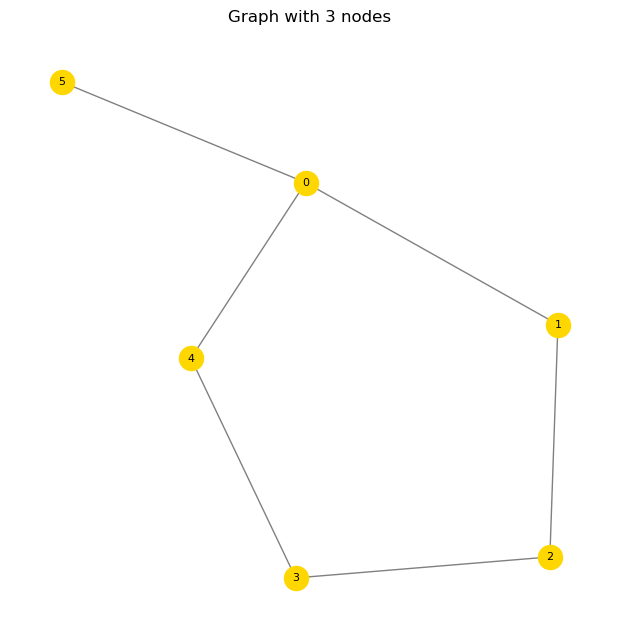

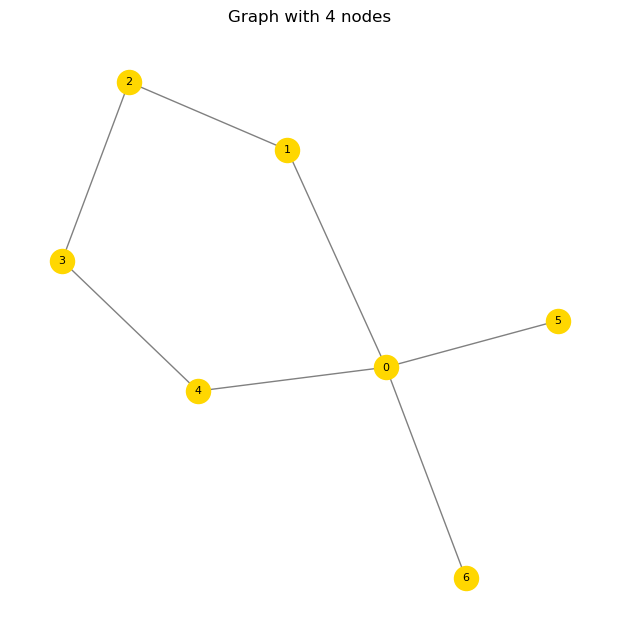

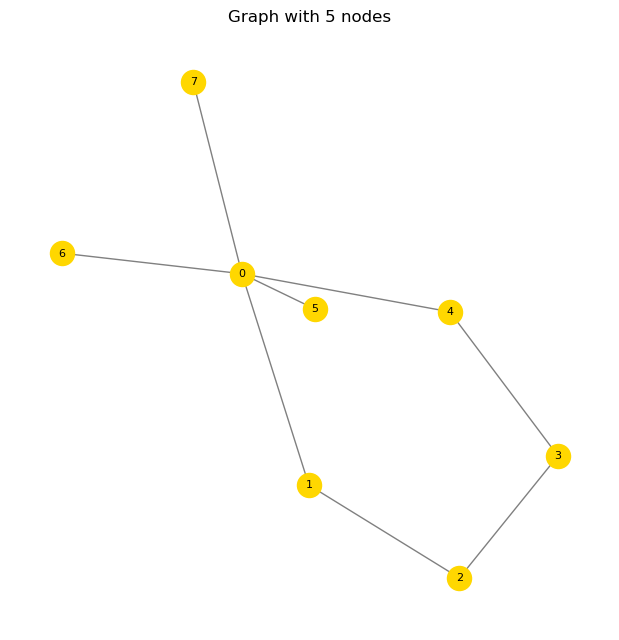

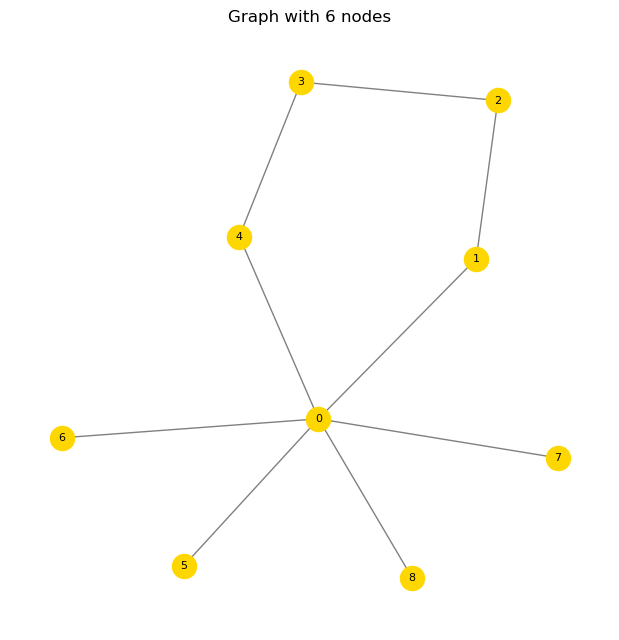

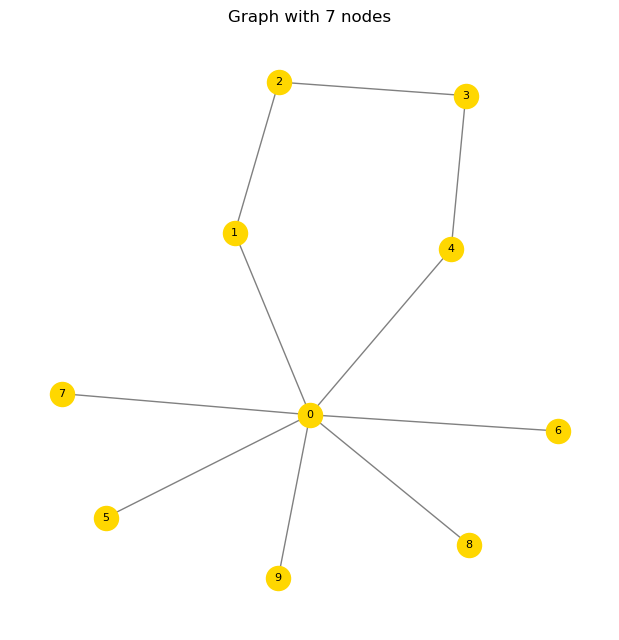

In [92]:
n = 10
cycle_length = 5
graphs = generate_graphs_with_triangle_and_central_node(n, cycle_length)
draw_each_graph_individually(graphs)